In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# plt.rcParams.update({
#     'font.family': 'sans-serif',
#     'font.sans-serif': ['DejaVu Sans', 'Liberation Sans', 'Nimbus Sans L', 'Arial'],
#     'axes.labelsize': 16,
#     'axes.labelweight': 'semibold',
#     'xtick.labelsize': 14,
#     'ytick.labelsize': 14,
# })


In [2]:
# find distribution of scores across the three hospitals
def hospital_score_distribution(data_file):
    # read in the data
    df = pd.read_csv(data_file)

    # hospital = os.path.basename(data_file).split('_')[0]
    # if 'LUS' in hospital:
    #     hospital = 'JCUH'

    # change empty strings to NaN
    df.replace('', pd.NA, inplace=True)

    # don't count duplicates    
    df.drop_duplicates(subset=['Patient ID', 'Scan No', 'Scan Label'], inplace=True)

    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    
    # Deterministically assign 1.5 scores: first half to 1, second half to 2
    mask_1_5 = df['Score'] == 1.5
    indices_1_5 = df[mask_1_5].index
    half_point = len(indices_1_5) // 2

    df.loc[indices_1_5[:half_point], 'Score'] = 1
    df.loc[indices_1_5[half_point:], 'Score'] = 2

    df['Score'] = df['Score'].astype('Int64')

    # count score occurences
    distribution = df['Score'].value_counts().sort_index()

    # plot bar chart
    distribution.plot(kind='bar', title='Score Distribution', xlabel='Score', ylabel='Count')
    return distribution





In [13]:
# count score distribution for each of the four scan numbers
def scan_number_score_distribution(data_file):
    # read in the data
    df = pd.read_csv(data_file)

    # hospital = os.path.basename(data_file).split('_')[0]
    # if 'LUS' in hospital:
    #     hospital = 'JCUH'

    # change empty strings to NaN
    df.replace('', pd.NA, inplace=True)

    # don't count duplicates    
    df.drop_duplicates(subset=['Patient ID', 'Scan No', 'Scan Label'], inplace=True)

    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

    # Deterministically assign 1.5 scores: first half to 1, second half to 2
    mask_1_5 = df['Score'] == 1.5
    indices_1_5 = df[mask_1_5].index
    half_point = len(indices_1_5) // 2

    df.loc[indices_1_5[:half_point], 'Score'] = 1
    df.loc[indices_1_5[half_point:], 'Score'] = 2

    df['Score'] = df['Score'].astype('Int64')


    scan_nos = sorted(df['Scan No'].unique(), key=lambda x: int(str(x)[-1]))


    # distributions = {}
    # for label in scan_nos:
    #     label_df = df[df['Scan No'] == label]
    #     distribution = label_df['Score'].value_counts().sort_index()
    #     distributions[label] = distribution

    # # Create grouped bar chart
    # fig, ax = plt.subplots(figsize=(12, 6))
    
    # # Get all possible scores
    # all_scores = sorted(df['Score'].dropna().unique())
    
    # # Set width and positions for bars
    # bar_width = 0.2
    # x = range(len(all_scores))
    # num_scans = len(scan_nos)
    # blues = plt.cm.Blues([(i + 3) / (num_scans + 2) for i in range(num_scans)])
    
    # # Plot bars for each scan number
    # for i, scan_no in enumerate(scan_nos):
    #     counts = [distributions[scan_no].get(score, 0) for score in all_scores]
    #     positions = [pos + (i * bar_width) for pos in x]
    #     ax.bar(positions, counts, bar_width, label=f'Scan No: {scan_no}', color=blues[i]) 
    
    # # Center x-ticks on each score group and format labels
    # group_centers = [pos + bar_width * (num_scans - 1) / 2 for pos in x]
    # ax.set_xticks(group_centers)
    # ax.set_xticklabels([int(s) for s in all_scores], fontsize=16)

    # # Set labels and title
    # ax.set_xlabel('Score', fontsize=18, fontweight='bold')  # inherits rcParams font
    # ax.set_ylabel('Count', fontsize=18, fontweight='bold')  # inherits rcParams font
    # ax.tick_params(axis='y', labelsize=16)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # plt.tight_layout()
    # plt.show()

   
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(data=df, x='Score', hue='Scan No', hue_order = scan_nos, palette='Blues_d', ax=ax, legend=False)
    
    ax.set_xlabel('Score', fontsize=18, fontname='DejaVu Serif')
    ax.set_ylabel('Count', fontsize=18, fontname='DejaVu Serif')
    ax.tick_params(axis='both', labelsize=14)
    # ax.legend(title='Scan No', fontsize=12, title_fontsize=14)
    # sns.despine()
    plt.tight_layout()
    plt.show()

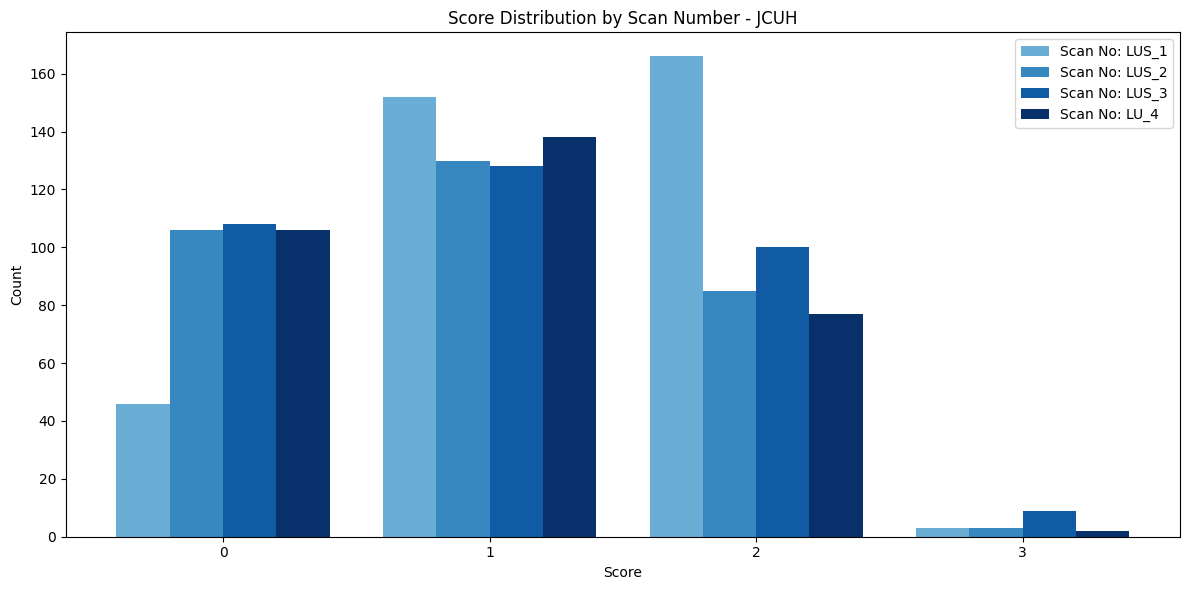

{'LUS_1': Score
 0     46
 1    152
 2    166
 3      3
 Name: count, dtype: Int64,
 'LUS_2': Score
 0    106
 1    130
 2     85
 3      3
 Name: count, dtype: Int64,
 'LUS_3': Score
 0    108
 1    128
 2    100
 3      9
 Name: count, dtype: Int64,
 'LU_4': Score
 0    106
 1    138
 2     77
 3      2
 Name: count, dtype: Int64}

In [4]:
scan_number_score_distribution('LUS_data.csv')

Score
0    366
1    548
2    428
3     17
Name: count, dtype: Int64

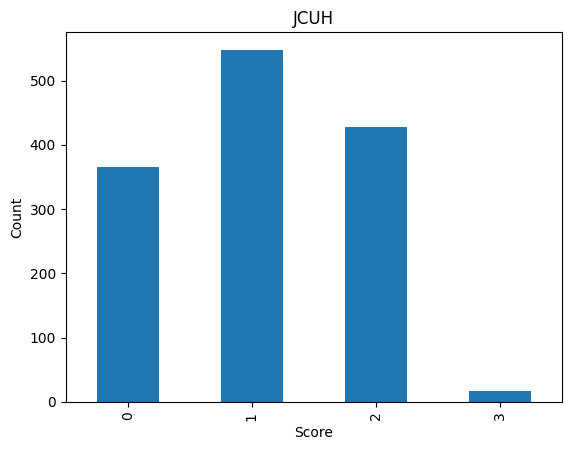

In [5]:
hospital_score_distribution('LUS_data.csv')

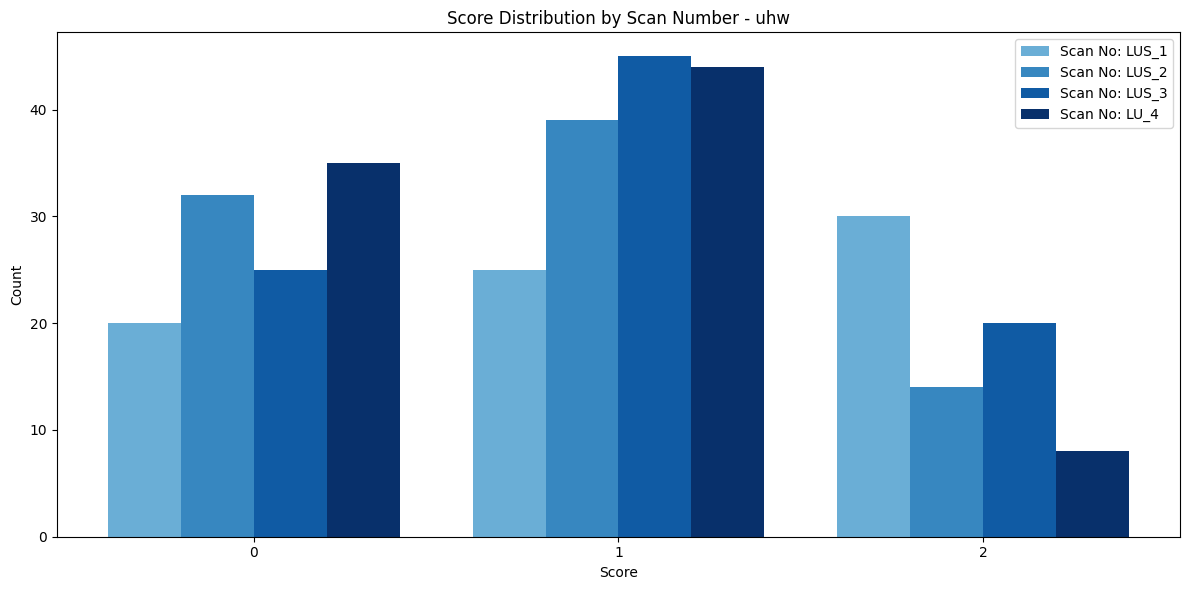

{'LUS_1': Score
 0    20
 1    25
 2    30
 Name: count, dtype: Int64,
 'LUS_2': Score
 0    32
 1    39
 2    14
 Name: count, dtype: Int64,
 'LUS_3': Score
 0    25
 1    45
 2    20
 Name: count, dtype: Int64,
 'LU_4': Score
 0    35
 1    44
 2     8
 Name: count, dtype: Int64}

In [6]:
scan_number_score_distribution('uhw_data.csv')

Score
0    112
1    153
2     72
Name: count, dtype: Int64

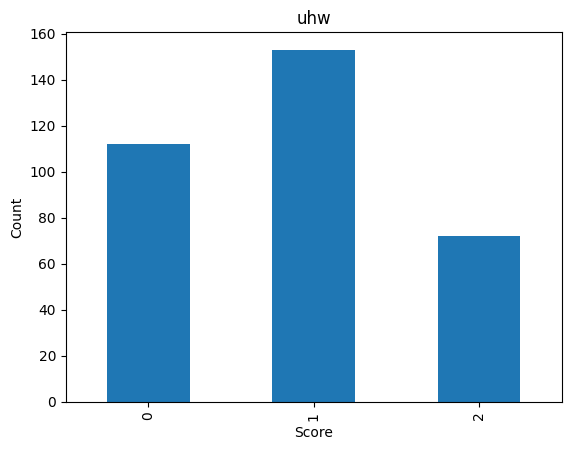

In [7]:
hospital_score_distribution('uhw_data.csv')

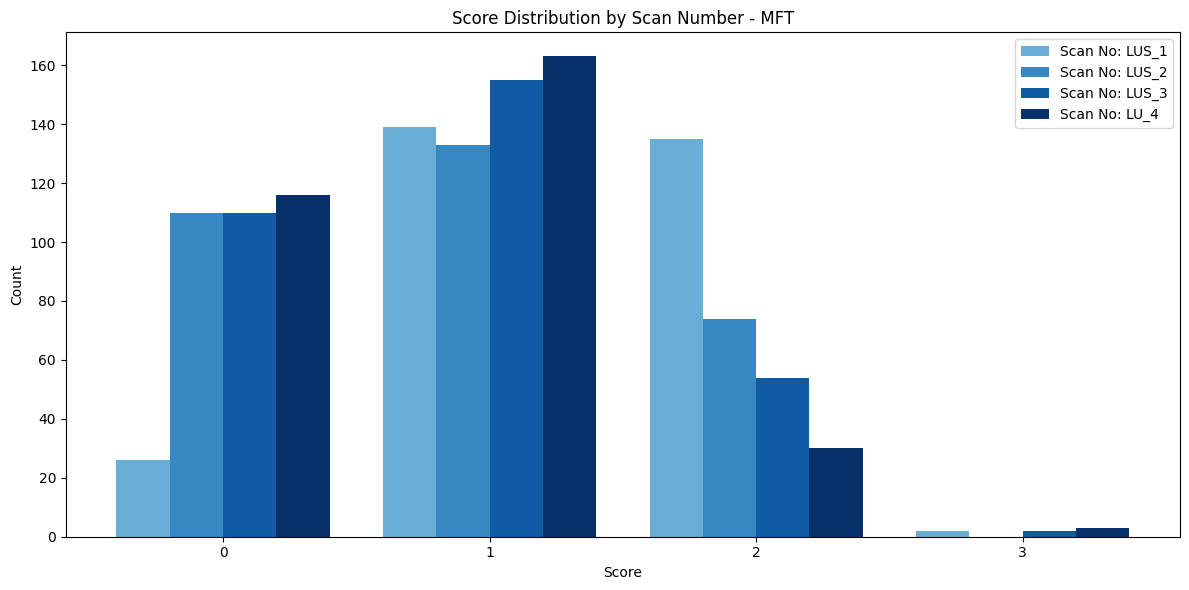

{'LUS_1': Score
 0     26
 1    139
 2    135
 3      2
 Name: count, dtype: Int64,
 'LUS_2': Score
 0    110
 1    133
 2     74
 Name: count, dtype: Int64,
 'LUS_3': Score
 0    110
 1    155
 2     54
 3      2
 Name: count, dtype: Int64,
 'LU_4': Score
 0    116
 1    163
 2     30
 3      3
 Name: count, dtype: Int64}

In [8]:
scan_number_score_distribution('MFT_data.csv')

Score
0    362
1    590
2    293
3      7
Name: count, dtype: Int64

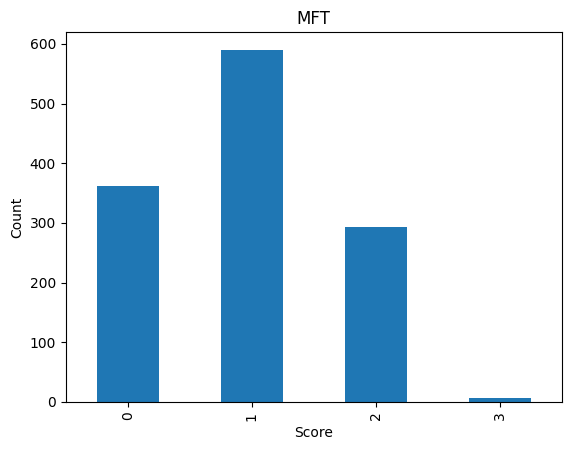

In [9]:
hospital_score_distribution('MFT_data.csv')

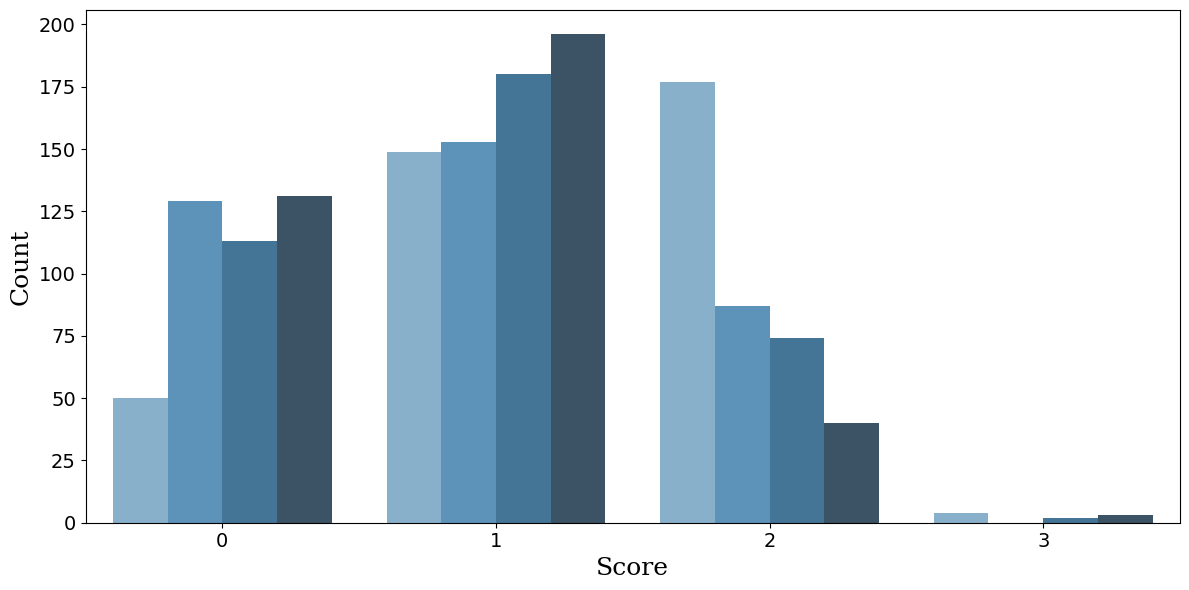

In [14]:
# combine all hospital data into one dataframe
scan_number_score_distribution('data_tables/all_data.csv')


Score
0    423
1    678
2    378
3      9
Name: count, dtype: Int64

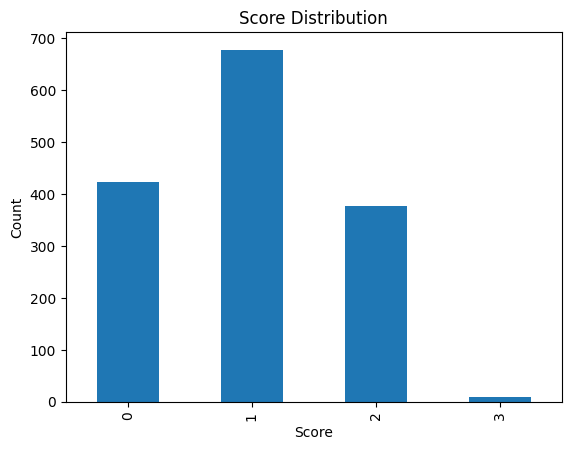

In [6]:
hospital_score_distribution('data_tables/all_data.csv')

In [ ]:
# count how many videos there are in all_data.csv
import pandas as pd
df_all = pd.read_csv('data_tables/all_data.csv')

# print number of scans
print("Number of scans:", df_all[['Hospital','Patient ID', 'Scan No']].drop_duplicates().shape[0]) 

# print the number of unique videos
print("Number of unique videos:", df_all[['Hospital','Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().shape[0]) 

# print number of scans with no_score = True
print("Number of scans without score:", df_all[df_all['no_score'] == True][['Hospital','Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().shape[0])



Number of scans: 314
Number of unique videos: 3079
Number of scans without score: 42


In [ ]:
print("Number of scans without score:", df_all[df_all['Score'] == ][['Hospital','Patient ID', 'Scan No', 'Scan Label']].drop_duplicates().shape[0])
